In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Suppress warnings from a specific library (e.g., pandas)
warnings.filterwarnings("ignore", module="pandas")

# Path to the log file
log_file_path = 'tick_data_20241220_153036.txt'

# Corrected regex patterns
request_pattern = r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}\.\d{3})\|Requesting market data for strike price: (\d+), right: (\w), date: (\d+), reqId=(\d+)'
general_pattern = r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}\.\d{3})\|(\d+)\|(\d+)\|([\d.]+)'

# Data lists for storing matched lines
request_data = []
all_data = []

# Read and parse the log file
with open(log_file_path, 'r') as file:
    for line in file:
        # Match "Requesting market data" lines
        request_match = re.match(request_pattern, line)
        if request_match:
            request_data.append(request_match.groups())
            continue
        
        # Match all lines with the general pattern for prices
        general_match = re.match(general_pattern, line)
        if general_match:
            all_data.append(general_match.groups())

# Create a DataFrame for "Requesting market data"
df_requests = pd.DataFrame(request_data, columns=["Timestamp", "StrikePrice", "Right", "Date", "ReqId"])
df_requests["StrikePrice"] = df_requests["StrikePrice"].astype(int)
df_requests["ReqId"] = df_requests["ReqId"].astype(int)
df_requests["Date"] = pd.to_datetime(df_requests["Date"], format='%Y%m%d')
df_requests["Timestamp"] = pd.to_datetime(df_requests["Timestamp"])

# Create a DataFrame for price data
df_all = pd.DataFrame(all_data, columns=["Timestamp", "ReqId", "TickType", "Price"])
df_all["ReqId"] = df_all["ReqId"].astype(int)
df_all["TickType"] = df_all["TickType"].astype(int)
df_all["Price"] = df_all["Price"].astype(float)
df_all["Timestamp"] = pd.to_datetime(df_all["Timestamp"])

# Extract unique ReqIds with all associated data from df_requests
df_unique_reqids = df_requests.drop_duplicates(subset=["ReqId"])
df_unique_reqids = df_unique_reqids.sort_values(by="StrikePrice", ascending=False)

In [2]:
df_unique_reqids

,Timestamp,StrikePrice,Right,Date,ReqId
53,2024-12-20 18:28:04.009,601,C,2024-12-20,154
52,2024-12-20 18:28:04.009,601,P,2024-12-20,153
51,2024-12-20 17:42:15.659,600,C,2024-12-20,152
50,2024-12-20 17:42:15.659,600,P,2024-12-20,151
49,2024-12-20 17:36:44.860,599,C,2024-12-20,150
48,2024-12-20 17:36:44.851,599,P,2024-12-20,149
47,2024-12-20 17:30:40.198,598,C,2024-12-20,148
46,2024-12-20 17:30:40.198,598,P,2024-12-20,147
45,2024-12-20 17:17:39.606,597,C,2024-12-20,146
44,2024-12-20 17:17:39.595,597,P,2024-12-20,145


In [3]:
# Filter rows where ReqId == 105
df_P = df_all[df_all["ReqId"] == 105].copy()  # Use .copy() to avoid SettingWithCopyWarning
# Locate the StrikePrice and Right from df_requests for ReqId == 105
strike_price_P = df_requests.loc[df_requests["ReqId"] == 105, "StrikePrice"].values[0]
right_P = df_requests.loc[df_requests["ReqId"] == 105, "Right"].values[0]
# Add the values to the filtered DataFrame
df_P.loc[:, "StrikePrice"] = strike_price_P
df_P.loc[:, "Right"] = right_P
df_P = df_P.reset_index(drop=True)
df_P

,Timestamp,ReqId,TickType,Price,StrikePrice,Right
0,2024-12-20 15:30:42.786,105,1,2.61,582,P
1,2024-12-20 15:30:42.797,105,2,2.68,582,P
2,2024-12-20 15:30:42.869,105,1,2.58,582,P
3,2024-12-20 15:30:42.869,105,2,2.67,582,P
4,2024-12-20 15:30:42.889,105,1,2.61,582,P
...,...,...,...,...,...,...
37201,2024-12-20 22:13:21.531,105,2,0.01,582,P
37202,2024-12-20 22:13:45.911,105,2,0.02,582,P
37203,2024-12-20 22:13:45.911,105,2,0.01,582,P
37204,2024-12-20 22:13:54.177,105,2,0.02,582,P


In [4]:
df_C = df_all[df_all["ReqId"] == 106].copy()  # Use .copy() to avoid SettingWithCopyWarning
# Locate the StrikePrice and Right from df_requests for ReqId == 106
strike_price_C = df_requests.loc[df_requests["ReqId"] == 106, "StrikePrice"].values[0]
right_C = df_requests.loc[df_requests["ReqId"] == 106, "Right"].values[0]
# Add the values to the filtered DataFrame
df_C.loc[:, "StrikePrice"] = strike_price_C
df_C.loc[:, "Right"] = right_C
df_C = df_C.reset_index(drop=True)
df_C

,Timestamp,ReqId,TickType,Price,StrikePrice,Right
0,2024-12-20 15:30:42.869,106,1,2.00,582,C
1,2024-12-20 15:30:42.869,106,2,2.08,582,C
2,2024-12-20 15:30:42.889,106,1,2.01,582,C
3,2024-12-20 15:30:42.889,106,2,2.07,582,C
4,2024-12-20 15:30:42.982,106,1,2.00,582,C
...,...,...,...,...,...,...
83307,2024-12-20 22:14:50.324,106,2,9.38,582,C
83308,2024-12-20 22:14:52.638,106,1,7.20,582,C
83309,2024-12-20 22:14:52.638,106,2,10.07,582,C
83310,2024-12-20 22:14:52.638,106,2,9.38,582,C


In [5]:
hedge_level_id = 135 #133

df_hedge = df_all[df_all["ReqId"] == hedge_level_id].copy()  # Use .copy() to avoid SettingWithCopyWarning
# Locate the StrikePrice and Right from df_requests for ReqId == 106
strike_price_hedge = df_requests.loc[df_requests["ReqId"] == hedge_level_id, "StrikePrice"].values[0]
right_hedge = df_requests.loc[df_requests["ReqId"] == hedge_level_id, "Right"].values[0]
# Add the values to the filtered DataFrame
df_hedge.loc[:, "StrikePrice"] = strike_price_hedge
df_hedge.loc[:, "Right"] = right_hedge
df_hedge = df_hedge.reset_index(drop=True)

In [16]:
df_hedge.rename(columns={"Price": "Price_hedge"}, inplace=True)
df_hedge.rename(columns={"StrikePrice": "Strike_hedge"}, inplace=True)
df_hedge = df_hedge.dropna(subset=["Price_hedge"])
df_hedge['profit_hedge'] = df_hedge.iloc[0]['Price_hedge'] - df_hedge['Price_hedge'] 
df_hedge.reset_index(drop=True, inplace=True)
df_hedge.head(60)

,Timestamp,ReqId,TickType,Price_hedge,Strike_hedge,Right,profit_hedge
0,2024-12-20 16:28:29.854,135,2,5.710368,592,P,0.000000
1,2024-12-20 16:28:29.971,135,1,5.711312,592,P,-0.000944
2,2024-12-20 16:28:29.971,135,2,5.712224,592,P,-0.001856
3,2024-12-20 16:28:30.133,135,2,5.713392,592,P,-0.003024
4,2024-12-20 16:28:30.647,135,1,5.714688,592,P,-0.004320
5,2024-12-20 16:28:30.647,135,2,5.716192,592,P,-0.005824
6,2024-12-20 16:28:31.448,135,1,5.717248,592,P,-0.006880
7,2024-12-20 16:28:31.448,135,2,5.720928,592,P,-0.010560
8,2024-12-20 16:28:31.609,135,1,5.722320,592,P,-0.011952
9,2024-12-20 16:28:31.609,135,2,5.726080,592,P,-0.015712


In [7]:
df = pd.merge(df_P, df_C, on="Timestamp", how="inner")
df

,Timestamp,ReqId_x,TickType_x,Price_x,StrikePrice_x,Right_x,ReqId_y,TickType_y,Price_y,StrikePrice_y,Right_y
0,2024-12-20 15:30:42.869,105,1,2.58,582,P,106,1,2.00,582,C
1,2024-12-20 15:30:42.869,105,1,2.58,582,P,106,2,2.08,582,C
2,2024-12-20 15:30:42.869,105,2,2.67,582,P,106,1,2.00,582,C
3,2024-12-20 15:30:42.869,105,2,2.67,582,P,106,2,2.08,582,C
4,2024-12-20 15:30:42.889,105,1,2.61,582,P,106,1,2.01,582,C
...,...,...,...,...,...,...,...,...,...,...,...
15492,2024-12-20 22:11:01.112,105,2,0.02,582,P,106,2,9.21,582,C
15493,2024-12-20 22:11:01.112,105,2,0.01,582,P,106,1,6.86,582,C
15494,2024-12-20 22:11:01.112,105,2,0.01,582,P,106,2,9.21,582,C
15495,2024-12-20 22:13:45.911,105,2,0.02,582,P,106,1,7.97,582,C


In [8]:
df.rename(
    columns={
        "StrikePrice_x": "Strike_open",
        #"StrikePrice": "Strike_hedge",
        "Price_x": "Price_P",
        #"Price": "Price_hedge",
        "Price_y": "Price_C"
    },
    inplace=True
)

In [9]:
df

,Timestamp,ReqId_x,TickType_x,Price_P,Strike_open,Right_x,ReqId_y,TickType_y,Price_C,StrikePrice_y,Right_y
0,2024-12-20 15:30:42.869,105,1,2.58,582,P,106,1,2.00,582,C
1,2024-12-20 15:30:42.869,105,1,2.58,582,P,106,2,2.08,582,C
2,2024-12-20 15:30:42.869,105,2,2.67,582,P,106,1,2.00,582,C
3,2024-12-20 15:30:42.869,105,2,2.67,582,P,106,2,2.08,582,C
4,2024-12-20 15:30:42.889,105,1,2.61,582,P,106,1,2.01,582,C
...,...,...,...,...,...,...,...,...,...,...,...
15492,2024-12-20 22:11:01.112,105,2,0.02,582,P,106,2,9.21,582,C
15493,2024-12-20 22:11:01.112,105,2,0.01,582,P,106,1,6.86,582,C
15494,2024-12-20 22:11:01.112,105,2,0.01,582,P,106,2,9.21,582,C
15495,2024-12-20 22:13:45.911,105,2,0.02,582,P,106,1,7.97,582,C


In [10]:
df = df[['Timestamp','Strike_open','Price_P','Price_C']]

df

,Timestamp,Strike_open,Price_P,Price_C
0,2024-12-20 15:30:42.869,582,2.58,2.00
1,2024-12-20 15:30:42.869,582,2.58,2.08
2,2024-12-20 15:30:42.869,582,2.67,2.00
3,2024-12-20 15:30:42.869,582,2.67,2.08
4,2024-12-20 15:30:42.889,582,2.61,2.01
...,...,...,...,...
15492,2024-12-20 22:11:01.112,582,0.02,9.21
15493,2024-12-20 22:11:01.112,582,0.01,6.86
15494,2024-12-20 22:11:01.112,582,0.01,9.21
15495,2024-12-20 22:13:45.911,582,0.02,7.97


In [14]:
df["Price_P"] = df["Price_P"].rolling(window=10).mean()
df["Price_C"] = df["Price_C"].rolling(window=10).mean()
df_hedge["Price_hedge"] = df_hedge["Price_hedge"].rolling(window=25).mean()
df_hedge["profit_hedge"] = df_hedge["profit_hedge"].rolling(window=25).mean()
df = df.drop(index=range(0, 26))
df['Net_premium'] = df["Price_P"] + df["Price_C"]
df['profit'] = df.iloc[0]['Net_premium'] - df['Net_premium'] 

df.reset_index(drop=True, inplace=True)
df.head(60)

,Timestamp,Strike_open,Price_P,Price_C,Net_premium,profit
0,2024-12-20 15:30:51.200,582,2.6725,2.0178,4.6903,0.0000
1,2024-12-20 15:30:51.200,582,2.6703,2.0190,4.6893,0.0010
2,2024-12-20 15:30:51.200,582,2.6685,2.0218,4.6903,0.0000
3,2024-12-20 15:30:51.519,582,2.6667,2.0234,4.6901,0.0002
4,2024-12-20 15:30:51.519,582,2.6649,2.0248,4.6897,0.0006
5,2024-12-20 15:30:51.519,582,2.6645,2.0262,4.6907,-0.0004
6,2024-12-20 15:30:51.519,582,2.6655,2.0272,4.6927,-0.0024
7,2024-12-20 15:30:51.686,582,2.6653,2.0281,4.6934,-0.0031
8,2024-12-20 15:30:51.686,582,2.6639,2.0289,4.6928,-0.0025
9,2024-12-20 15:30:51.686,582,2.6641,2.0296,4.6937,-0.0034


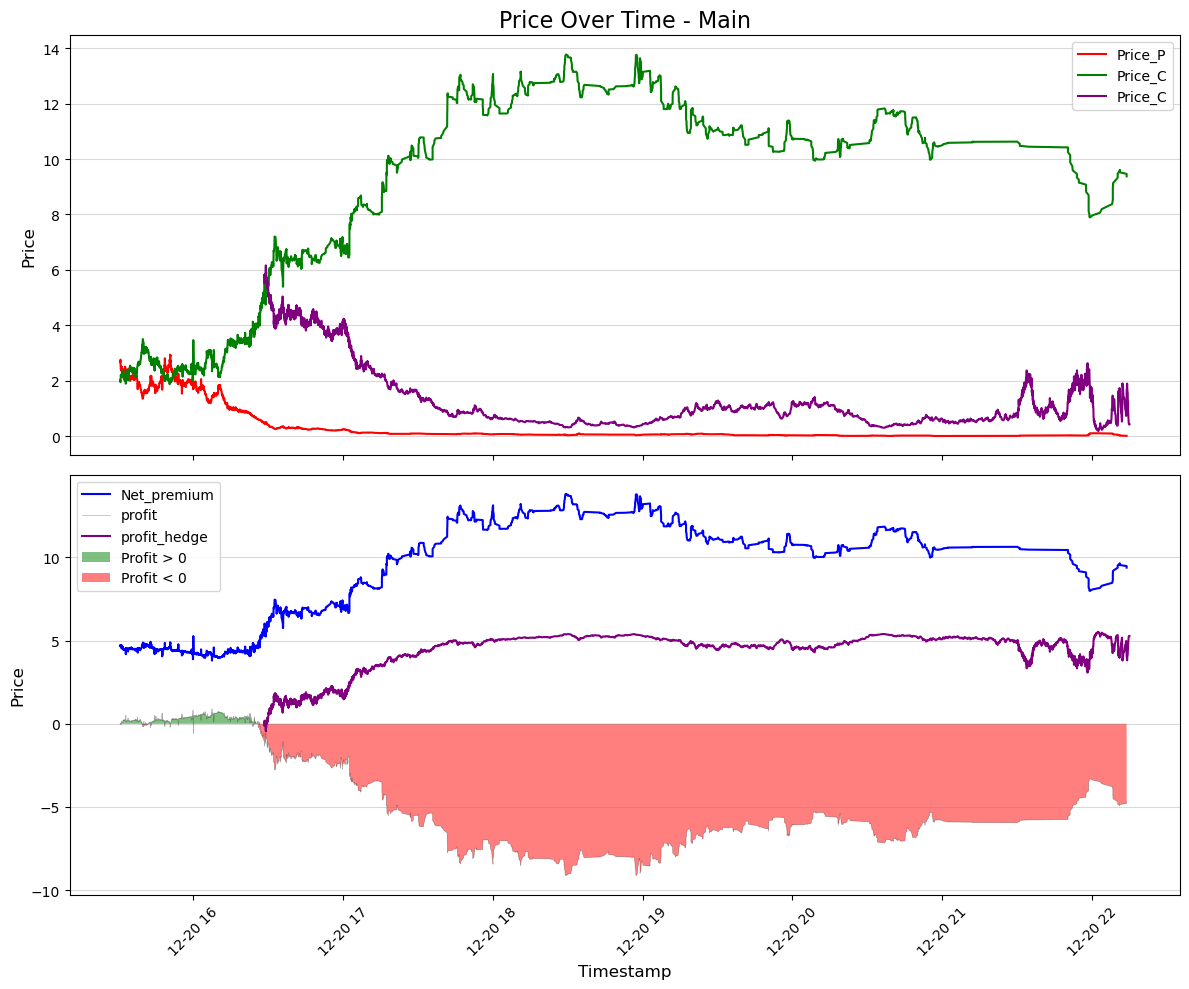

In [19]:
# Align df and df_hedge on Timestamp
aligned_df = pd.merge(df, df_hedge, on="Timestamp", how="inner")

# Compute the new line: sum of profit and profit_hedge
profit_sum = aligned_df["profit"] + aligned_df["profit_hedge"]

# Plot the new line in the second subplot
axes[1].plot(aligned_df["Timestamp"], profit_sum, linestyle='--', label="profit_sum", color='orange')

# Continue with the rest of your plot setup
plt.show()


fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot Price_P (red) and Price_C (green) in the first subplot
axes[0].plot(df["Timestamp"], df["Price_P"], linestyle='-', label="Price_P", color='red')
axes[0].plot(df["Timestamp"], df["Price_C"], linestyle='-', label="Price_C", color='green')
axes[0].plot(df_hedge["Timestamp"], df_hedge["Price_hedge"], linestyle='-', label="Price_C", color='purple')
axes[0].set_title("Price Over Time - Main", fontsize=16)
axes[0].set_ylabel("Price", fontsize=12)
axes[0].legend()
axes[0].grid(axis='y', color='grey', alpha=0.3)

# Plot Net_premium (blue) in the second subplot
axes[1].plot(df["Timestamp"], df["Net_premium"], linestyle='-', label="Net_premium", color='blue')
axes[1].plot(df["Timestamp"], df["profit"], label="profit", color='black', alpha=0.3, linewidth=0.5)
axes[1].plot(df_hedge["Timestamp"], df_hedge["profit_hedge"], linestyle='-', label="profit_hedge", color='purple')


# Fill the area above and below 0
axes[1].fill_between(
    df["Timestamp"],
    df["profit"],
    0,
    where=(df["profit"] >= 0),
    facecolor='green',
    alpha=0.5,
    interpolate=True,
    label="Profit > 0"
)
axes[1].fill_between(
    df["Timestamp"],
    df["profit"],
    0,
    where=(df["profit"] < 0),
    facecolor='red',
    alpha=0.5,
    interpolate=True,
    label="Profit < 0"
)

axes[1].set_xlabel("Timestamp", fontsize=12)
axes[1].set_ylabel("Price", fontsize=12)
axes[1].legend()
axes[1].grid(axis='y', color='grey', alpha=0.3)

# Adjust x-axis labels for better readability
plt.xticks(rotation=45)

# Ensure layout doesn't overlap
plt.tight_layout()

# Show the plot
plt.show()

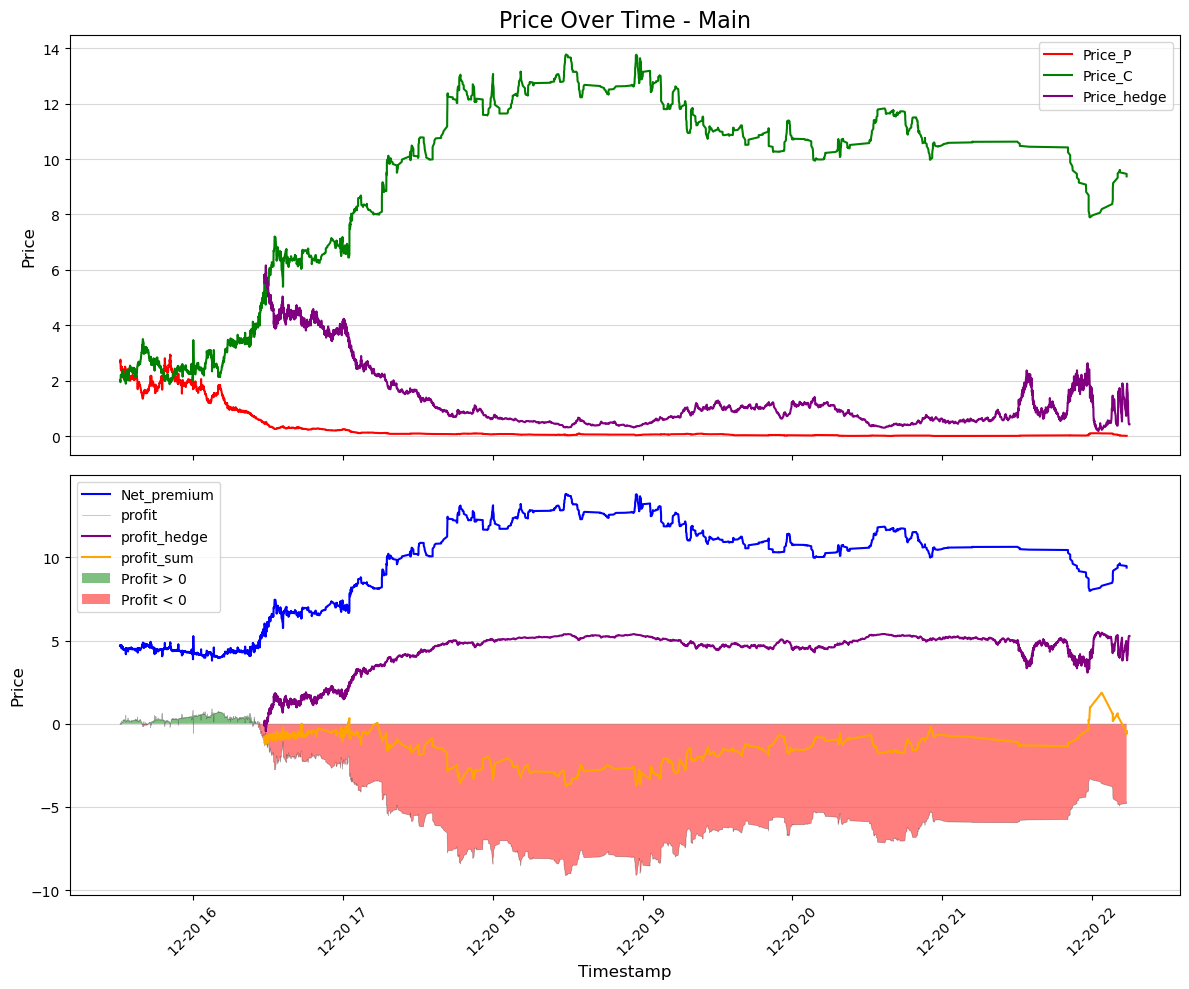

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Align df and df_hedge on Timestamp
aligned_df = pd.merge(df, df_hedge, on="Timestamp", how="inner")

# Compute the new line: sum of profit and profit_hedge
profit_sum = aligned_df["profit"] + aligned_df["profit_hedge"]

# Create the subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot Price_P (red) and Price_C (green) in the first subplot
axes[0].plot(df["Timestamp"], df["Price_P"], linestyle='-', label="Price_P", color='red')
axes[0].plot(df["Timestamp"], df["Price_C"], linestyle='-', label="Price_C", color='green')
axes[0].plot(df_hedge["Timestamp"], df_hedge["Price_hedge"], linestyle='-', label="Price_hedge", color='purple')
axes[0].set_title("Price Over Time - Main", fontsize=16)
axes[0].set_ylabel("Price", fontsize=12)
axes[0].legend()
axes[0].grid(axis='y', color='grey', alpha=0.3)

# Plot Net_premium (blue) in the second subplot
axes[1].plot(df["Timestamp"], df["Net_premium"], linestyle='-', label="Net_premium", color='blue')
axes[1].plot(df["Timestamp"], df["profit"], label="profit", color='black', alpha=0.3, linewidth=0.5)
axes[1].plot(df_hedge["Timestamp"], df_hedge["profit_hedge"], linestyle='-', label="profit_hedge", color='purple')

# Plot the profit_sum in the second subplot
axes[1].plot(aligned_df["Timestamp"], profit_sum, label="profit_sum", color='orange')

# Fill the area above and below 0
axes[1].fill_between(
    df["Timestamp"],
    df["profit"],
    0,
    where=(df["profit"] >= 0),
    facecolor='green',
    alpha=0.5,
    interpolate=True,
    label="Profit > 0"
)
axes[1].fill_between(
    df["Timestamp"],
    df["profit"],
    0,
    where=(df["profit"] < 0),
    facecolor='red',
    alpha=0.5,
    interpolate=True,
    label="Profit < 0"
)

# Configure labels, legend, and grid for the second subplot
axes[1].set_xlabel("Timestamp", fontsize=12)
axes[1].set_ylabel("Price", fontsize=12)
axes[1].legend()
axes[1].grid(axis='y', color='grey', alpha=0.3)

# Adjust x-axis labels for better readability
plt.xticks(rotation=45)

# Ensure layout doesn't overlap
plt.tight_layout()

# Show the plot
plt.show()


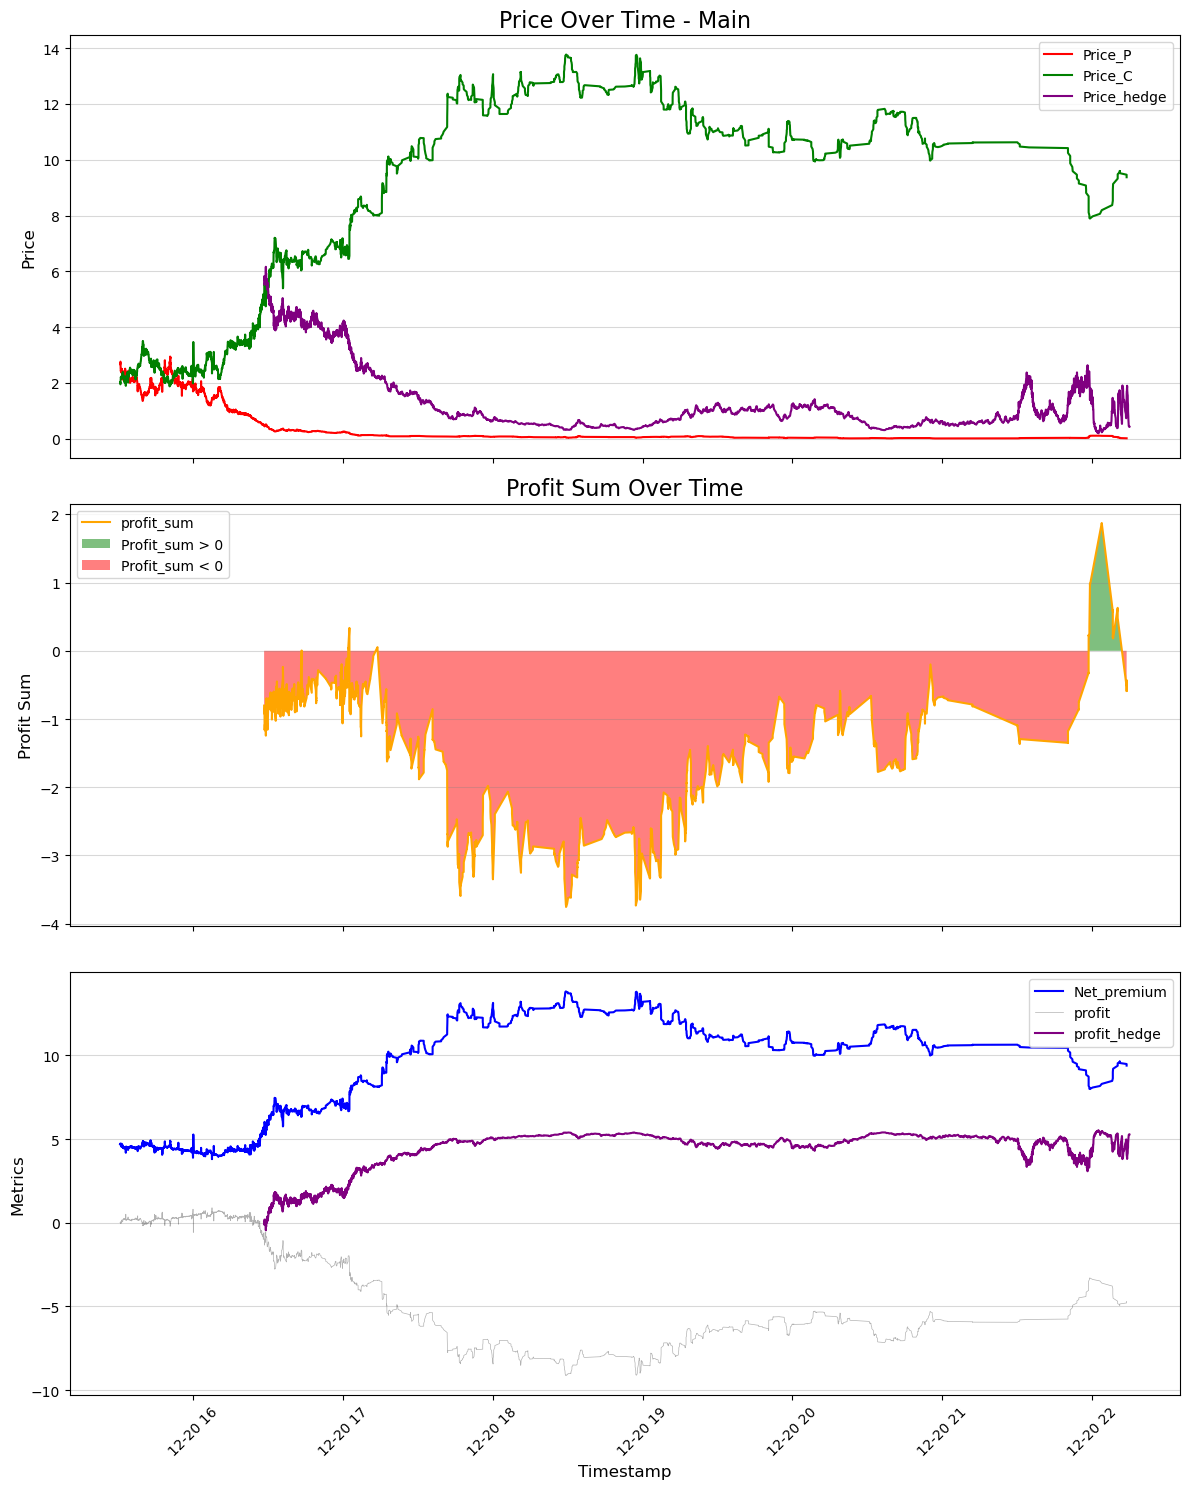

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Align df and df_hedge on Timestamp
aligned_df = pd.merge(df, df_hedge, on="Timestamp", how="inner")

# Compute the new line: sum of profit and profit_hedge
profit_sum = aligned_df["profit"] + aligned_df["profit_hedge"]

# Create the subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 15), sharex=True)

# Plot Price_P (red) and Price_C (green) in the first subplot
axes[0].plot(df["Timestamp"], df["Price_P"], linestyle='-', label="Price_P", color='red')
axes[0].plot(df["Timestamp"], df["Price_C"], linestyle='-', label="Price_C", color='green')
axes[0].plot(df_hedge["Timestamp"], df_hedge["Price_hedge"], linestyle='-', label="Price_hedge", color='purple')
axes[0].set_title("Price Over Time - Main", fontsize=16)
axes[0].set_ylabel("Price", fontsize=12)
axes[0].legend()
axes[0].grid(axis='y', color='grey', alpha=0.3)

# Plot Net_premium (blue) and other metrics in the second subplot
axes[1].plot(aligned_df["Timestamp"], profit_sum, label="profit_sum", color='orange')

# Fill the area above and below 0 for 'profit_sum'
axes[1].fill_between(
    aligned_df["Timestamp"],
    profit_sum,
    0,
    where=(profit_sum >= 0),
    facecolor='green',
    alpha=0.5,
    interpolate=True,
    label="Profit_sum > 0"
)
axes[1].fill_between(
    aligned_df["Timestamp"],
    profit_sum,
    0,
    where=(profit_sum < 0),
    facecolor='red',
    alpha=0.5,
    interpolate=True,
    label="Profit_sum < 0"
)

axes[1].set_title("Profit Sum Over Time", fontsize=16)
axes[1].set_ylabel("Profit Sum", fontsize=12)
axes[1].legend()
axes[1].grid(axis='y', color='grey', alpha=0.3)

# Plot other metrics in the third subplot
axes[2].plot(df["Timestamp"], df["Net_premium"], linestyle='-', label="Net_premium", color='blue')
axes[2].plot(df["Timestamp"], df["profit"], label="profit", color='black', alpha=0.3, linewidth=0.5)
axes[2].plot(df_hedge["Timestamp"], df_hedge["profit_hedge"], linestyle='-', label="profit_hedge", color='purple')
axes[2].set_xlabel("Timestamp", fontsize=12)
axes[2].set_ylabel("Metrics", fontsize=12)
axes[2].legend()
axes[2].grid(axis='y', color='grey', alpha=0.3)

# Adjust x-axis labels for better readability across all subplots
plt.xticks(rotation=45)

# Ensure layout doesn't overlap
plt.tight_layout()

# Show the plot
plt.show()


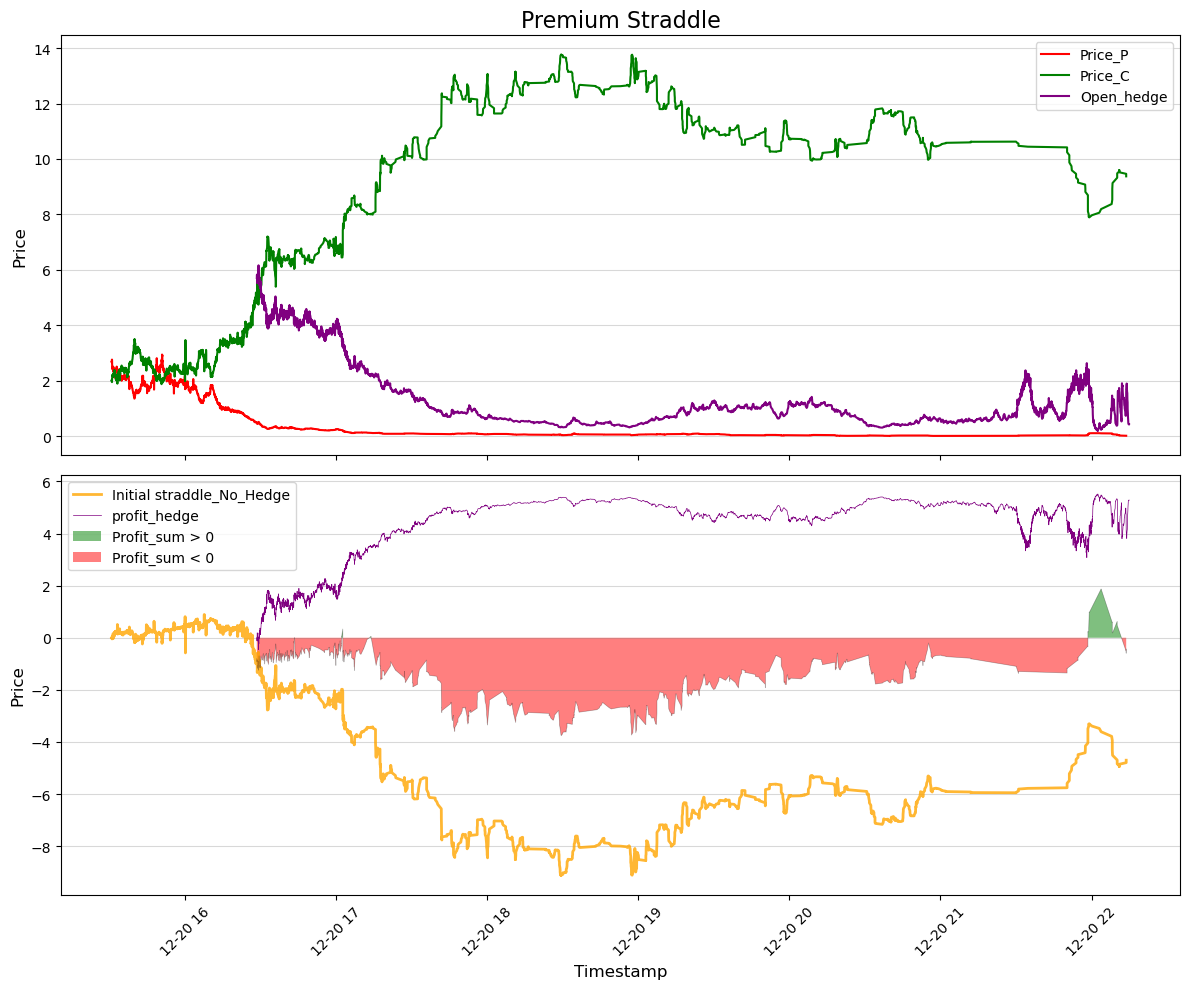

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

# Align df and df_hedge on Timestamp
aligned_df = pd.merge(df, df_hedge, on="Timestamp", how="inner")

# Compute the new line: sum of profit and profit_hedge
profit_sum = aligned_df["profit"] + aligned_df["profit_hedge"]

# Create the subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot Price_P (red) and Price_C (green) in the first subplot
axes[0].plot(df["Timestamp"], df["Price_P"], linestyle='-', label="Price_P", color='red')
axes[0].plot(df["Timestamp"], df["Price_C"], linestyle='-', label="Price_C", color='green')
axes[0].plot(df_hedge["Timestamp"], df_hedge["Price_hedge"], linestyle='-', label="Open_hedge", color='purple')
axes[0].set_title("Premium Straddle", fontsize=16)
axes[0].set_ylabel("Price", fontsize=12)
axes[0].legend()
axes[0].grid(axis='y', color='grey', alpha=0.3)

# Plot Net_premium (blue) and other metrics in the second subplot
#axes[1].plot(df["Timestamp"], df["Net_premium"], linestyle='-', label="Net_premium", color='blue')
axes[1].plot(df["Timestamp"], df["profit"], label="Initial straddle_No_Hedge", color='orange', alpha=0.8, linewidth= 2)
axes[1].plot(df_hedge["Timestamp"], df_hedge["profit_hedge"], linestyle='-', label="profit_hedge", color='purple', linewidth= 0.5)

# Plot the profit_sum in the second subplot
axes[1].plot(aligned_df["Timestamp"], profit_sum, color='black',alpha=0.3, linewidth=0.5)

# Fill the area above and below 0 for 'profit_sum'
axes[1].fill_between(
    aligned_df["Timestamp"],
    profit_sum,
    0,
    where=(profit_sum >= 0),
    facecolor='green',
    alpha=0.5,
    interpolate=True,
    label="Profit_sum > 0"
)
axes[1].fill_between(
    aligned_df["Timestamp"],
    profit_sum,
    0,
    where=(profit_sum < 0),
    facecolor='red',
    alpha=0.5,
    interpolate=True,
    label="Profit_sum < 0"
)

# Configure labels, legend, and grid for the second subplot
axes[1].set_xlabel("Timestamp", fontsize=12)
axes[1].set_ylabel("Price", fontsize=12)
axes[1].legend()
axes[1].grid(axis='y', color='grey', alpha=0.3)

# Adjust x-axis labels for better readability
plt.xticks(rotation=45)

# Ensure layout doesn't overlap
plt.tight_layout()

# Show the plot
plt.show()
